In [3]:
data = open("Rapport.pgn", "r").read()

In [4]:
DELIM = '|'
chars = set(list(data))
chars.add(DELIM)

In [5]:
parts = data.split("\n\n")
games = ["\n".join([DELIM, header, "", moves, DELIM]) for header, moves in zip(parts[::2], parts[1::2])]
print(games[10])

|
[Event "16th Donau Open"]
[Site "Aschach Donau AUT"]
[Date "2007.12.27"]
[Round "3"]
[White "Rapport,R"]
[Black "Danilov,I"]
[Result "1/2-1/2"]
[WhiteElo "2197"]
[BlackElo "2414"]
[ECO "C66"]

1.e4 e5 2.Nf3 Nc6 3.Bb5 a6 4.Ba4 d6 5.c3 Nf6 6.O-O Bd7 7.Re1 h6 8.d4 Qe7
9.d5 Nd8 10.Nbd2 g6 11.Nf1 Bg7 12.Ng3 O-O 13.Bxd7 Nxd7 14.Nd2 Kh7 15.c4 Bf6
16.Nf3 Bg5 17.Nxg5+ hxg5 18.Qg4 f6 19.h4 Nf7 20.h5 Nh6 21.hxg6+ Kg7 22.Nf5+ Nxf5
23.exf5 Rh8 24.g3 Rh6 25.Be3 Rah8 26.Qe4 Rh2 27.Kf1 R8h3 28.g4 Qe8 29.Ke2 Qh8
30.Rg1 Qh4 31.b4 b6 32.a4 a5 33.bxa5 Nc5 34.Bxc5 Rb3 35.Ra2 bxc5 36.Ke1 Qh3
37.Ke2 Qc3 38.Rc2 Qxa5 39.Rh1 Rbh3 40.Rxh2 Rxh2 41.Kf3 Qxa4 42.Kg3 Rh8 43.Rc1 Qa3+
44.Qe3 Qa2 45.Qc3 Ra8 46.Kg2 Qe2 47.Qf3 Qb2 48.Rh1 Ra3 49.Qd1 Qc3 50.Rh7+ Kg8
51.Rh8+ Kg7 52.Rh7+ Kg8 53.Rh8+  1/2-1/2
|


In [6]:
stoi = {c: i for i, c in enumerate(sorted(chars))}
itos = {i: c for c, i in stoi.items()}

DELIM_INT = stoi['|']

In [7]:
import torch

order = len(chars)
stoi = {c: i for i, c in enumerate(sorted(chars))}
itos = {i: c for c, i in stoi.items()}

N = torch.zeros(order, order, dtype=torch.int32)
for item in games:
    for x, y in zip(item, item[1:]):
        N[stoi[x], stoi[y]] += 1

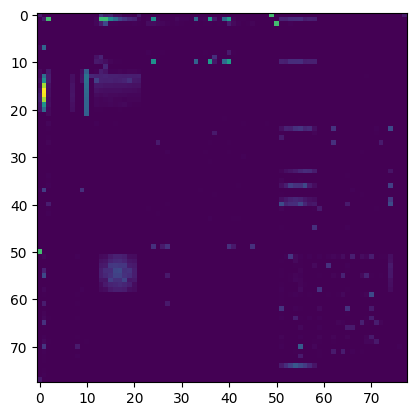

In [8]:
import matplotlib.pyplot as plt

plt.imshow(N)

In [9]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [16]:
# Generate a new PGN
# Modify SEED to chang output

SEED = 4
generator = torch.Generator().manual_seed(SEED)

pgn = ""

ix = DELIM_INT
while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=generator).item()
    if ix == DELIM_INT:
        break
    pgn += itos[ix]

print(pgn)



301.Qe3.Qd4.Ne6 1412.Qc3 05.Bg19.Nxad201120.Kxbxd5 3260.Blt Ra327 Bllappo,Sa6 Ng7 2.Nck 3 2 Ba5+ 2.Qh4+ 18 c6 Rc6 d4"]
3 "]
27 2 4 Nb5.2 Qgulite3 Kf6 12.Bla5.Rb3 23.Blo d2 17 5 2 1-102-O-O KhiteEla8 6+ 6
3 Rbxc20"Kxa300-01
[ECO 2-1.Kit,ac6 c4 4 Kd68
10.1.e7 e7.f18.Bxf5 Nf37 Ne6.Qxd10.g1.Rc30.Rb6 15 Be1.h4.Bxg7.Rc4 Qxd20-OMe Rf6.Ra4 5.Kh5 Bd4 Nf45 Bd5 Bxe8 Kc4 h7 Bg6 Ke4 b6 Bhxb4 "]
19.Rxd8.Qat Rh,Rxckla3.Be "2 1.10.Qe3 Rg47.Rxc3 "]


31/2+ "]
[Re6 Ra7 16 253 Nb7
[D3.Rf18.Bb4719.Bxf6 Bf2.cxe4



In [11]:
# Evaluate model with the negative log likelihood

log_likelihood = 0
num_bigrams = 0
L = P.log()

for item in games:
    for x, y in zip(item, item[1:]):
        log_likelihood += L[stoi[x], stoi[y]]
        num_bigrams += 1

average_nll = -(log_likelihood / num_bigrams).item()

print(f'{average_nll=}')

average_nll=2.1688690185546875
